# Rperesentación del shuffle iterativo

## Definición del los datos

In [19]:
% matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import sqrt

# Se define la forma de los datos

SIZE = 256
TYPE = np.uint32
TAM_TYPE = TYPE().dtype.itemsize
TYPE_2 = np.uint8
TAM_TYPE_2 = TYPE_2().dtype.itemsize
RATIO = TAM_TYPE // TAM_TYPE_2

## Representación de los datos en su forma real

### Código

In [20]:
# Se crean las matrices de datos

data = np.empty([SIZE, SIZE], dtype=TYPE)
for i in range(SIZE):
    data[i] = np.arange(SIZE, dtype=TYPE)   
    
data_out = np.empty([SIZE, SIZE], dtype=TYPE) + 1 # El + 1 evita coincidencias en la primera comparación

data_orig = data

# Se calulan las permutaciones hasta que se llega, otra vez, a la matriz inicial

data_to_plot = [data]

while np.array_equal(data_orig, data_out) is False:
    
    for i in range(SIZE):
        chunk = data[i].view(TYPE_2)
        chunk_out = np.empty([SIZE], dtype=TYPE).view(TYPE_2)
        
        for k in range(TAM_TYPE):
            chunk_out[SIZE * k:SIZE * (k+1):] = chunk[k::TAM_TYPE]
        
        data_out[i] = chunk_out.view(TYPE)
    
    data_to_plot.append(np.array(data_out))
    data = data_out

### Representación de los resultados

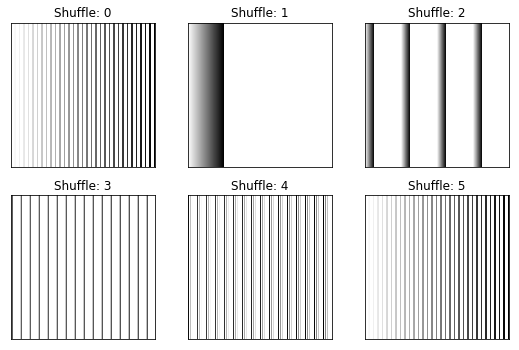

In [24]:
tam = int((sqrt(len(data_to_plot)) - 0.01) // 1) + 1

f, axarr = plt.subplots(tam, tam, figsize=(3*tam,3*tam))

for i, elem in enumerate(data_to_plot):
    axarr[i // tam, i % tam].imshow(elem, cmap='binary')
    axarr[i // tam, i % tam].set_title('Shuffle: ' + str(i))
    axarr[i // tam, i % tam].xaxis.set_major_locator(plt.NullLocator())
    axarr[i // tam, i % tam].yaxis.set_major_locator(plt.NullLocator())

for i in range(len(data_to_plot), tam * tam):
    axarr[i // tam, i % tam].set_visible(False)

plt.show()

## Representación de los datos en bytes

### Código

In [25]:
# Se crean las matrices de datos

data = np.empty([SIZE * RATIO, SIZE], dtype=TYPE).view(TYPE_2)
for i in range(SIZE * RATIO):
    data[i] = np.arange(SIZE, dtype=TYPE).view(TYPE_2)
    
data_out = np.empty([SIZE * RATIO, SIZE], dtype=TYPE).view(TYPE_2) + 1

data_orig = data

# Se calulan las permutaciones hasta que se llega, otra vez, a la matriz inicial

data_to_plot = [data]

while np.array_equal(data_orig, data_out) is False:
    
    for i in range(SIZE*RATIO):
        chunk = data[i]
        chunk_out = np.empty([SIZE], dtype=TYPE).view(TYPE_2)
        
        for k in range(TAM_TYPE):
            chunk_out[SIZE * k:SIZE * (k+1):] = chunk[k::TAM_TYPE]
        
        data_out[i] = chunk_out
    
    data_to_plot.append(np.array(data_out))
    data = data_out

### Representación de los resultados

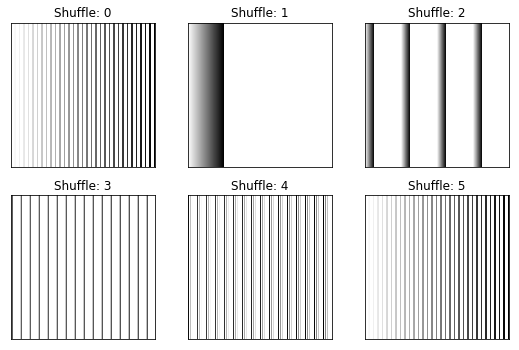

In [26]:
tam = int((sqrt(len(data_to_plot)) - 0.01) // 1) + 1

f, axarr = plt.subplots(tam, tam, figsize=(3*tam,3*tam))

for i, elem in enumerate(data_to_plot):
    axarr[i // tam, i % tam].imshow(elem, cmap='binary')
    axarr[i // tam, i % tam].set_title('Shuffle: ' + str(i))
    axarr[i // tam, i % tam].xaxis.set_major_locator(plt.NullLocator())
    axarr[i // tam, i % tam].yaxis.set_major_locator(plt.NullLocator())

for i in range(len(data_to_plot), tam * tam):
    axarr[i // tam, i % tam].set_visible(False)

plt.show()

## Conclusiones

Como se puede observar en la gráficas anteriores, en la primera iteración se obtienen unos datos que permiten conseguir un ratio de compresión óptimo.

Se deduce que si la distribución de los datos que produce el mejor ratio de compresión no se consigue en la primera iteración, se pierde la posibilidad de mejorarlo. Es por ello que surje la necesidad de implementar el filtro shuffle de forma iterativa.